## Check HDF5 File
Utility notebook used when make_plots.py isn't working as expected.<br>
Open an HDF5 output of workflows/SUEP_coffea.py and check out its contents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import hist
import mplhep as hep
import numpy as np

In [2]:
plt.style.use(hep.style.CMS)

In [3]:
def h5load(ifile, label):
    with pd.HDFStore(ifile, 'r') as store:
        data = store[label] 
        metadata = store.get_storer(label).attrs.metadata
        return data, metadata

In [4]:
f = '../condor_test_QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8.hdf5'
event_vars, m = h5load(f,'vars')

In [5]:
event_vars

,events,luminosityBlock,genWeight,ht,ht_JEC,ht_JEC_JER_up,ht_JEC_JER_down,ht_JEC_JES_up,ht_JEC_JES_down,HLT_PFHT1050,...,muon_l_sl_deltaR,muon_S1,muon_interIsolation_0p2,muon_interIsolation_0p4,muon_interIsolation_0p8,muon_interIsolation_1p6,nMuons_eta_ring_0p2,nMuons_eta_ring_0p4,nMuons_eta_ring_0p8,nMuons_eta_ring_1p6
0,42575390,4005,1.0,3419.03125,3416.574463,3416.606445,3416.541260,3442.949219,3390.199707,True,...,1.292088,0.504002,0.000000,0.000000,0.000000,1.661149,1,2,6,6
0,139193940,16130,1.0,2774.25000,2786.427002,2787.847168,2785.013672,2809.818604,2763.035400,True,...,0.007616,0.170825,0.749759,0.749759,0.934364,0.934364,5,5,5,6
0,210761283,27654,1.0,3640.90625,3654.689453,3657.957520,3651.087402,3687.903564,3621.475586,True,...,2.219073,0.340380,0.000000,0.000000,0.207662,0.451268,2,2,2,5
0,158633000,19786,1.0,2306.46875,2320.689453,2322.132812,2319.136963,2341.262451,2300.116943,True,...,1.134287,0.178035,1.884517,1.884517,2.509690,3.332730,3,5,6,6
0,197562240,24842,1.0,2663.03125,2664.972412,2665.243896,2664.701172,2687.517822,2642.427002,True,...,0.085658,0.005058,0.904422,1.016464,1.016464,1.016464,6,6,6,7
0,183409415,24191,1.0,2455.75000,2459.404297,2459.147217,2459.666504,2474.188477,2444.620361,True,...,0.590156,0.077302,0.000000,0.000000,0.157897,0.157897,2,2,5,6
0,208141909,26727,1.0,3090.00000,3093.615723,3093.954102,3093.279297,3123.792969,3063.438721,True,...,0.346978,0.162295,0.000000,0.258564,0.258564,0.258564,4,5,5,6
0,87181202,11499,1.0,2484.00000,2493.211182,2497.008057,2489.408691,2509.841309,2476.581543,True,...,0.062803,0.502823,0.731401,0.731401,0.731401,1.061378,2,2,4,4
0,203142246,25857,1.0,2183.53125,2179.309570,2179.864746,2178.748047,2231.350098,2157.837891,True,...,0.102389,0.024385,0.571963,0.742993,0.742993,0.778840,3,5,6,6
0,85206246,11238,1.0,3653.31250,3640.278320,3637.101318,3643.470215,3669.086182,3611.470459,True,...,2.919505,0.393326,0.652661,0.652661,0.652661,0.652661,3,3,3,3


In [6]:
m['gensumweight']

27427130.0

In [7]:
cleaned_events = event_vars[event_vars['nMuons_mediumId'] >= 6]

In [9]:
cleaned_events[
    ['genWeight', 'nMuons_mediumId', 'nMuons_tightId', 'ht']
]

,genWeight,nMuons_mediumId,nMuons_tightId,ht
0,1.0,6,4,3419.03125
0,1.0,7,6,2774.25000
0,1.0,7,5,3640.90625
0,1.0,6,5,2306.46875
0,1.0,7,5,2663.03125
0,1.0,6,5,2455.75000
0,1.0,6,3,3090.00000
0,1.0,6,6,2484.00000
0,1.0,6,4,2183.53125
0,1.0,6,6,3653.31250


In [7]:
for key in event_vars:
    #if "Muon" in key or "muon" in key:
        print(key)

genWeight
ht
ht_JEC
ht_JEC_JER_up
ht_JEC_JER_down
ht_JEC_JES_up
ht_JEC_JES_down
HLT_PFHT1050
ngood_ak4jets
Pileup_nTrueInt
PSWeight
prefire_nom
prefire_up
prefire_down
PV_npvs
PV_npvsGood
SUEP_genMass
SUEP_genPt
SUEP_genEta
SUEP_genPhi
MET_pt
MET_phi
MET_sumEt
bTag_score_leading
bTag_score_subleading
bTag_score_third
bTag_score_fourth
nMuons
nMuons_highPurity
nMuons_isPFcand
nMuons_looseId
nMuons_mediumId
nMuons_tightId
nMuons_triggerIdLoose
nMuons_isTracker
muon_pt_mean
muon_dxy_mean
muon_dz_mean
muon_ip3d_mean
muon_pt_leading
muon_pt_subleading
muon_miniPFRelIso_all_leading
muon_miniPFRelIso_all_subleading
muon_miniPFRelIso_all_mean
muon_l_sl_deltaphi
muon_l_sl_deltaeta
muon_l_sl_deltaR
muon_S1
muon_interIsolation_0p2
muon_interIsolation_0p4
muon_interIsolation_0p8
muon_interIsolation_1p6
nMuons_eta_ring_0p2
nMuons_eta_ring_0p4
nMuons_eta_ring_0p8
nMuons_eta_ring_1p6


In [10]:
column = "muon_interIsolation_leading"
h = hist.Hist.new.Reg(50, 0, 3, name=column, label=column).Weight()
h.fill(event_vars[column].to_numpy(), weight=event_vars['genWeight'].to_numpy())

Hist(Regular(50, 0, 3, name='muon_interIsolation_leading', label='muon_interIsolation_leading'), storage=Weight()) # Sum: WeightedSum(value=226402, variance=4.48238e+09)

In [12]:
xsec = 1.325
lumi = 59817.406
weight = xsec * lumi / h.sum().value
h *= weight

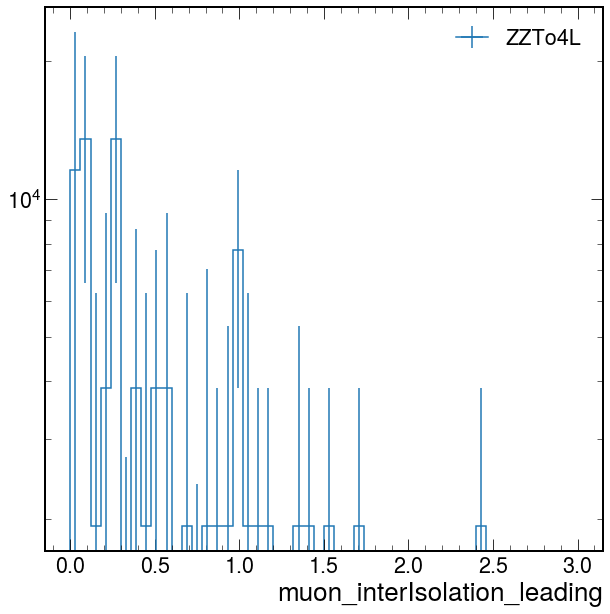

In [13]:
hep.histplot(h, yerr=np.sqrt(h.variances()), label='ZZTo4L')
plt.legend()
plt.yscale('log')

In [11]:
plt.hist(htloose, bins=np.linspace(0,5000,100),  histtype='step', label='loose')
plt.hist(httight, bins=np.linspace(0,5000,100), histtype='step', label='tight')
plt.yscale('log')
plt.legend()
print(np.sum(htloose))
print(np.sum(httight))

NameError: name 'htloose' is not defined